In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-6-29ab5558f1ef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='benign_0__mal_1',data=df, palette='viridis')


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

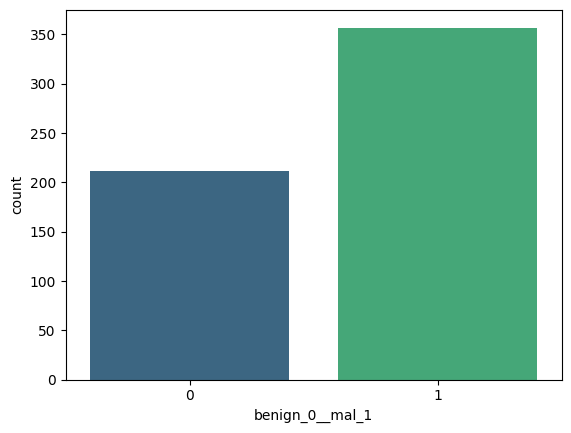

In [6]:
sns.countplot(x='benign_0__mal_1',data=df, palette='viridis')

<Axes: >

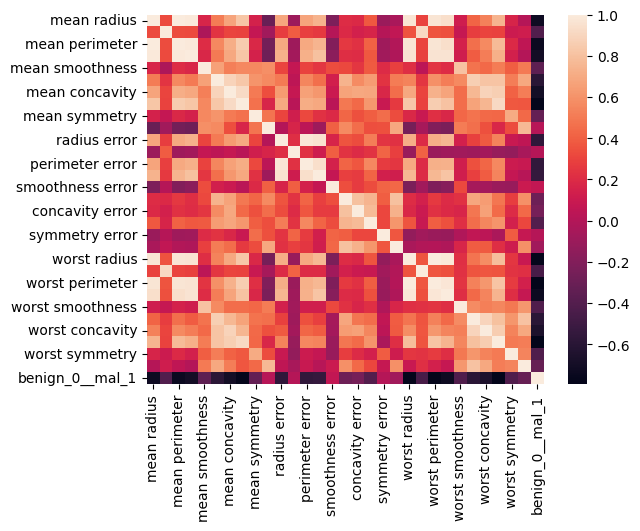

In [7]:
sns.heatmap(df.corr())

In [8]:
#defining the corr with the target by sorting the correct values
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

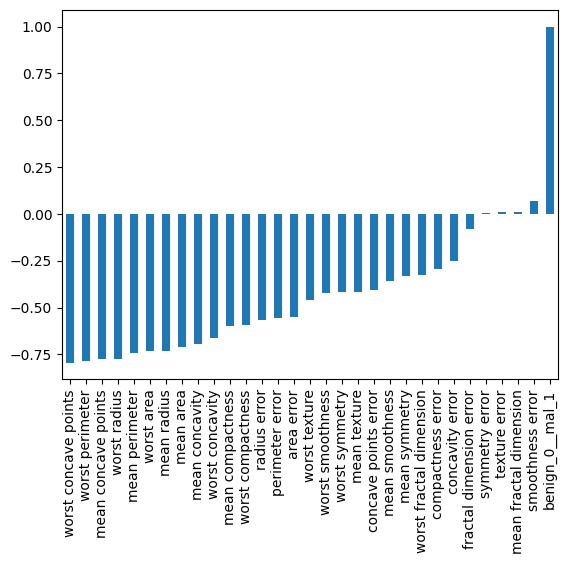

In [9]:
 df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

#Train test split

In [10]:
#Everything except the target column is an input
X = df.drop('benign_0__mal_1',axis=1).values

In [11]:
#Target column
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#MinMax Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_train
#Every training data value is in the same scale

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [18]:
X_test = scaler.fit_transform(X_test)

In [19]:
X_test

array([[0.1928458 , 0.40117994, 0.18540287, ..., 0.29080262, 0.43698543,
        0.19517931],
       [0.27894224, 0.27531957, 0.26553084, ..., 0.25673441, 0.35528816,
        0.20094062],
       [0.22103213, 0.29252704, 0.2115914 , ..., 0.28367206, 0.44996833,
        0.16743092],
       ...,
       [0.46138472, 0.6366765 , 0.48292538, ..., 0.68756459, 0.22102597,
        0.78953557],
       [0.15492236, 0.38348083, 0.16583588, ..., 0.48777127, 0.33470551,
        0.44032922],
       [0.35376416, 0.52605703, 0.36314262, ..., 0.73510162, 0.44331856,
        0.58259847]])

#Creating a deep neural network

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
#Dense = Hidden layer
#Activation = Activation function

In [21]:
model = Sequential()
model.add(Dense(units=30, activation='relu')) #input layer
model.add(Dense(units=15, activation='relu')) #hidden layer

model.add(Dense(units=1, activation='sigmoid')) #output layer
model.compile(loss='binary_crossentropy', optimizer='adam') #compiling all


#Train our model

In [43]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/600
14/14 [==============================] - 3s 101ms/step - loss: 0.6629 - val_loss: 0.6667
Epoch 2/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6620 - val_loss: 0.6687
Epoch 3/600
14/14 [==============================] - 0s 31ms/step - loss: 0.6592 - val_loss: 0.6668
Epoch 4/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6589 - val_loss: 0.6701
Epoch 5/600
14/14 [==============================] - 0s 25ms/step - loss: 0.6593 - val_loss: 0.6659
Epoch 6/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6590 - val_loss: 0.6668
Epoch 7/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6589 - val_loss: 0.6665
Epoch 8/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6570 - val_loss: 0.6649
Epoch 9/600
14/14 [==============================] - 0s 28ms/step - loss: 0.6564 - val_loss: 0.6665
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6575 - val_loss: 0.6648

In [44]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [45]:
losses = pd.DataFrame(model.history.history)


In [46]:
losses

,loss,val_loss
0,0.662903,0.666727
1,0.661985,0.668716
2,0.659154,0.666755
3,0.658946,0.670074
4,0.659287,0.665948
...,...,...
595,0.642742,0.651323
596,0.642826,0.651416
597,0.643170,0.652429
598,0.646581,0.649656


In [47]:
losses.max()

loss        0.662903
val_loss    0.692093
dtype: float64

In [48]:
losses.min()

loss        0.642742
val_loss    0.649656
dtype: float64

In [49]:
losses.head()

,loss,val_loss
0,0.662903,0.666727
1,0.661985,0.668716
2,0.659154,0.666755
3,0.658946,0.670074
4,0.659287,0.665948


<Axes: >

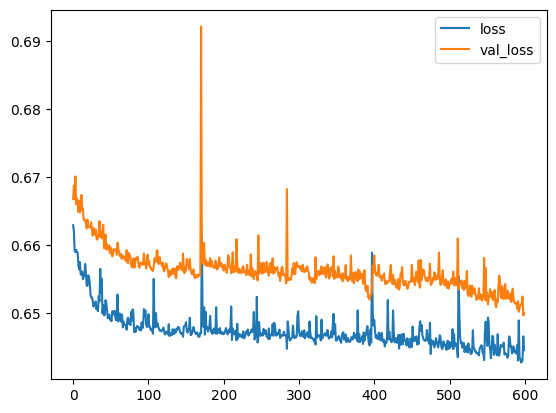

In [50]:
losses.plot()

After around 80 epoch the remaining computing is going to waste, the more amount of time in training is affecting the testing of the model. We need to deduce the epoch around 100. We need to stop the training automatically, once it gets the required answer. Money and time will be saved.


#Early stopping

Early stopping is a concept where it stops the training of the model at a particular epoch where we got the answer.

In [51]:
model_e = Sequential()
model_e.add(Dense(units=30, activation='relu')) #input layer
model_e.add(Dense(units=15, activation='relu')) #hidden layer

model_e.add(Dense(units=1, activation='sigmoid')) #output layer
model_e.compile(loss='binary_crossentropy', optimizer='adam') #compiling all

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
#entering the parameters
#criteria of early stop
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

In [54]:
model_e.fit(x=X_train,
            y=y_train,
            epochs=600,
            validation_data=(X_test, y_test),
            verbose=1,
            callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 23ms/step - loss: 0.6842 - val_loss: 0.6538
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6514 - val_loss: 0.6214
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6225 - val_loss: 0.5870
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5897 - val_loss: 0.5526
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5558 - val_loss: 0.5122
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5183 - val_loss: 0.4716
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4799 - val_loss: 0.4303
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4392 - val_loss: 0.3945
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4001 - val_loss: 0.3530
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3566 - val_loss: 0.3189
Epoch 11

In [55]:
model_loss = pd.DataFrame(model_e.history.history)

<Axes: >

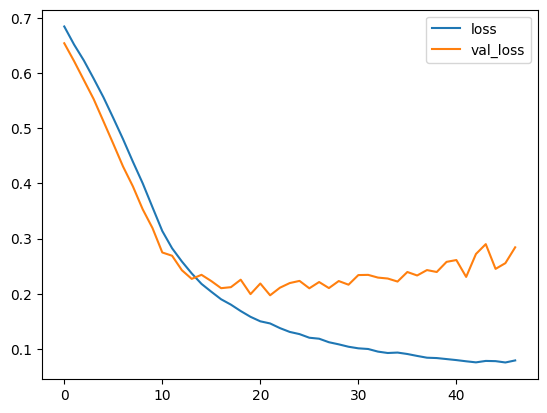

In [56]:
model_loss.plot()
#we are getting a graphical answer at 29

#Dropout technique

In [57]:
from tensorflow.keras.layers import Dropout

In [58]:
model_d = Sequential()
model_d.add(Dense(units=30, activation='relu')) #input layer
model_d.add(Dropout(0.5))
model_d.add(Dense(units=15, activation='relu')) #hidden layer
model_d.add(Dropout(0.5)) #every node has a 50% chance to get drop

model_d.add(Dense(units=1, activation='sigmoid')) #output layer
model_d.compile(loss='binary_crossentropy', optimizer='adam') #compiling all

In [59]:
model_d.fit(x=X_train,
            y=y_train,
            epochs=600,
            validation_data=(X_test, y_test),
            verbose=1,
            callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7391 - val_loss: 0.6885
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6970 - val_loss: 0.6726
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6735 - val_loss: 0.6609
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6513 - val_loss: 0.6418
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6333 - val_loss: 0.6126
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6199 - val_loss: 0.5820
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5956 - val_loss: 0.5542
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5990 - val_loss: 0.5320
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5583 - val_loss: 0.5079
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5304 - val_loss: 0.4755
Epoch 11

In [60]:
model_loss = pd.DataFrame(model_d.history.history)

<Axes: >

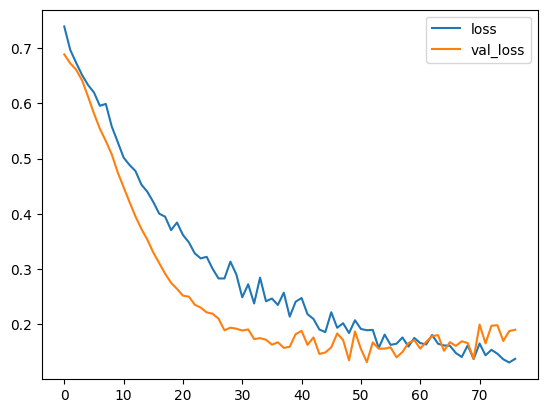

In [61]:
model_loss.plot()
#the nodes are lower and in between the nodes are getting dropped in between the training


In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
predictions = model.predict((X_test)>0.5).astype('int32')

5/5 [==============================] - 0s 2ms/step


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
confusion_matrix(y_test,predictions)

array([[55,  0],
       [88,  0]])

In [66]:
predictions_e = model_e.predict((X_test)>0.5).astype('int32')

5/5 [==============================] - 0s 2ms/step


In [67]:
print(classification_report(y_test,predictions_e))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        55
           1       1.00      0.01      0.02        88

    accuracy                           0.39       143
   macro avg       0.69      0.51      0.29       143
weighted avg       0.76      0.39      0.23       143



In [68]:
predictions_d = model_d.predict((X_test)>0.5).astype('int32')

5/5 [==============================] - 0s 3ms/step


In [69]:
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
confusion_matrix(y_test,predictions_d)


array([[55,  0],
       [88,  0]])